# Figures
A series of ipython/jupyter notebook cells to plot nice figures. 

## Figures for the presentation

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_style('darkgrid')

In [ ]:
# read a CSV file with the system dynamic
csv_file_name = "../local_results/2024-07-02-14-00-00-lotka-volterra/lotka-volterra.csv"
df_ode = pd.read_csv(csv_file_name)
# just consider a small part of the dynamic
df_ode = df_ode.iloc[:3000]

x = df_ode["t"].values
y_X = df_ode["x"].values
y_Y = df_ode["y"].values

figure, ax = plt.subplots(figsize=(8,6))
ax.plot(x, y_X, color='orange', label="x")
ax.plot(x, y_Y, color='green', label="y")
ax.set_xlabel("time")
ax.set_title("Trajectory from Lotka-Volterra's ODE system")
ax.legend(loc='best')

In [ ]:
# it would also be nice to get the Pareto fronts complexity/fitting
import pickle
# load PySRRegressor file for F_x
pysr_x_pickle_file_name = "../local_results/2024-07-02-14-00-00-lotka-volterra/regressor-F_x.pkl"
with open(pysr_x_pickle_file_name, "rb") as fp :
    pysr_x = pickle.load(fp)

complexity = pysr_x.equations_["complexity"].values
error = pysr_x.equations_["loss"].values

figure, ax = plt.subplots()

# now, this block of code plots red horizontal/vertical segments between points
for i in range(1, len(complexity)) :
    start_x = complexity[i-1]
    start_y = error[i-1]
    end_x = complexity[i]
    end_y = error[i]
    
    # first, a horizontal line
    ax.plot([start_x, end_x], [start_y, start_y], color='red')
    # then, a vertical line
    ax.plot([end_x, end_x], [start_y, end_y], color='red', alpha=0.3)
 
ax.scatter(complexity, error, zorder=2)
ax.set_title("Complexity/error Pareto front of equations for F_x")
ax.set_xlabel("complexity")
ax.set_ylabel("error")

In [ ]:
# load PySRRegressor file for F_x
pysr_y_pickle_file_name = "../local_results/2024-07-02-14-00-00-lotka-volterra/regressor-F_y.pkl"
with open(pysr_y_pickle_file_name, "rb") as fp :
    pysr_y = pickle.load(fp)

complexity = pysr_y.equations_["complexity"].values
error = pysr_y.equations_["loss"].values

figure, ax = plt.subplots()

# now, this block of code plots red horizontal/vertical segments between points
for i in range(1, len(complexity)) :
    start_x = complexity[i-1]
    start_y = error[i-1]
    end_x = complexity[i]
    end_y = error[i]
    
    # first, a horizontal line
    ax.plot([start_x, end_x], [start_y, start_y], color='red')
    # then, a vertical line
    ax.plot([end_x, end_x], [start_y, end_y], color='red', alpha=0.3)
 
ax.scatter(complexity, error, zorder=2)
ax.set_title("Complexity/error Pareto front of equations for F_y")
ax.set_xlabel("complexity")
ax.set_ylabel("error")

In [ ]:
print(pysr_y.equations_)

In [ ]:
# another figure, this time let's load the set of candidate ODE systems with their R2 value
r2_values_file_name = "../local_results/2024-07-02-14-00-00-lotka-volterra/candidates_initial_performance.csv"
df_r2 = pd.read_csv(r2_values_file_name)

# some of the R2 values are like -10^380, so let's threshold them
r2_values = np.maximum(df_r2["R2"].values, -1.0)
r2_values = np.sort(r2_values)[::-1]
#print(r2_values)

# some thresholds that will be used for conditional coloring
high = 0.75
medium = 0.50
low = 0.00
lowest = -0.999

y_highest = np.ma.masked_where(r2_values < high, r2_values)
y_high = np.ma.masked_where((r2_values > high) | (r2_values < medium), r2_values)
y_ok = np.ma.masked_where((r2_values > medium) | (r2_values < low), r2_values)
y_bad = np.ma.masked_where((r2_values > low) | (r2_values < lowest), r2_values)
y_worst = np.ma.masked_where(r2_values > lowest, r2_values)

fraction_of_highest = (r2_values > high).sum() / len(r2_values) * 100.0
fraction_of_high = (r2_values > medium).sum() / len(r2_values) * 100.0
fraction_of_ok = (r2_values > low).sum() / len(r2_values) * 100.0

fig, ax = plt.subplots()
x = [i for i in range(0, len(r2_values))]
#ax.scatter(x, r2_values)
ax.scatter(x, y_highest, color="green", label="%.2f%%" % fraction_of_highest)
ax.scatter(x, y_lowest, color="yellow", label="%.2f%%" % fraction_of_high)
ax.scatter(x, y_ok, color="orange", label="%.2f%%" % fraction_of_ok)
ax.scatter(x, y_bad, color="lightcoral")
ax.scatter(x, y_worst, color="red", label="R2 <= -1.0")
ax.set_xlabel("Candidate systems sorted by R2 value")
ax.set_ylabel("R2 value")
ax.set_title("Candidate ODE systems for Lotka-Volterra (%d total)" % len(r2_values))
ax.legend(loc='best')

In [ ]:
# let's now read the trajectory of another ODE system, Rossler
csv_file_name = "2024-07-09-23-20-16-rossler-stable/rossler-stable.csv"
df_ode = pd.read_csv(csv_file_name)
df_ode = df_ode.iloc[:200]

x = df_ode["t"].values
y_X_0 = df_ode["x_0"].values
y_X_1 = df_ode["x_1"].values
y_X_2 = df_ode["x_2"].values

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x, y_X_0, color="gold", label="x")
ax.plot(x, y_X_1, color="rebeccapurple", label="y")
ax.plot(x, y_X_2, color="slategray", label="z")
ax.set_xlabel("time")
ax.set_title("Trajectory from Rossler's ODE system")
ax.legend(loc='best')


In [ ]:
# we can probably do better
fig, axs = plt.subplots(figsize=(16,6), nrows=1, ncols=3)
axs[0].plot(x, y_X_0, color="gold", label="x")
axs[1].plot(x, y_X_1, color="rebeccapurple", label="y")
axs[2].plot(x, y_X_2, color="slategray", label="z")

axs[0].set_ylabel("x_0")
axs[1].set_ylabel("x_1")
axs[2].set_ylabel("x_2")

for ax in axs :
    ax.set_xlabel("t")
    
fig.suptitle("Trajectories from Rossler's ODE system")
fig.tight_layout()

# Figures from systematic experiments

In [37]:
import itertools
import matplotlib.pyplot as plt
import pandas as pd
import re as regex
import seaborn as sns

import matplotlib.patches as mpatches

sns.set_style('darkgrid')
# increase font size
sns.set_context("notebook", font_scale=1.1)

{'deltax_order_1_0.00': 0.8461538461538461, 'deltax_order_1_smoothed_w11_0.00': 0.8162393162393162, 'deltax_order_1_smoothed_w15_0.00': 0.7606837606837606, 'deltax_order_1_smoothed_w21_0.00': 0.688034188034188, 'deltax_order_1_smoothed_w25_0.00': 0.6709401709401709, 'deltax_order_1_smoothed_w5_0.00': 0.8418803418803419, 'deltax_order_2_0.00': 0.9401709401709402, 'deltax_order_2_smoothed_w11_0.00': 0.8205128205128205, 'deltax_order_2_smoothed_w15_0.00': 0.782051282051282, 'deltax_order_2_smoothed_w21_0.00': 0.6923076923076923, 'deltax_order_2_smoothed_w25_0.00': 0.6752136752136753, 'deltax_order_2_smoothed_w5_0.00': 0.905982905982906, 'deltax_order_3_0.00': 0.9529914529914529, 'deltax_order_3_smoothed_w11_0.00': 0.8290598290598291, 'deltax_order_3_smoothed_w15_0.00': 0.782051282051282, 'deltax_order_3_smoothed_w21_0.00': 0.6965811965811965, 'deltax_order_3_smoothed_w25_0.00': 0.6752136752136753, 'deltax_order_3_smoothed_w5_0.00': 0.9316239316239316, 'deltax_order_4_0.00': 0.965811965811

Text(0.5, 1.0, 'Rate of ground truth equations reaching $R2>0.9$ after data transformation, out of 234')

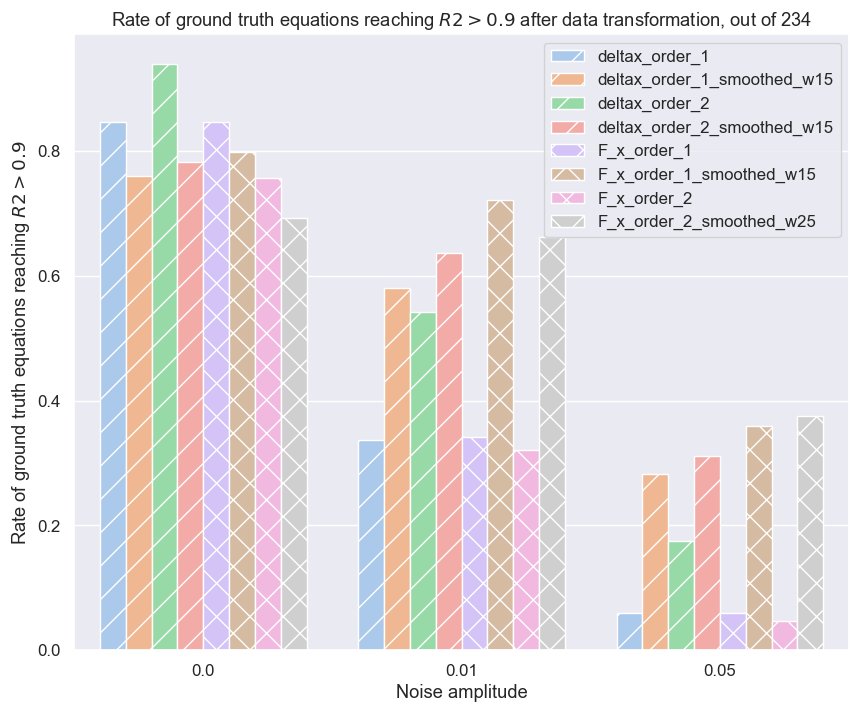

In [51]:
target_file = "../local_results/check_odebench_all_transformations/summary.csv"
df = pd.read_csv(target_file)
number_of_attempts = df.shape[0]

# informative: number of times the R2 for a particular combination of data transformation + noise is higher than 0.9
not_methods = ['system_id', 'variable', 'trajectory_id']
data = {c : (sum(df[c].values > 0.9) / df.shape[0]) for c in df.columns if c not in not_methods}
print(data)

dictionary = {'noise' : [], 'method' : [], 'performance' : []}
for c in data :
    # add a row, identifying method name and noise from key 'c'
    m = regex.match("([\w|\_]+)\_(0.0[0-9])", c)
    method = m.group(1)
    noise = m.group(2)
    dictionary['noise'].append(float(noise))
    dictionary['method'].append(method)
    dictionary['performance'].append(data[c])

df_data = pd.DataFrame.from_dict(dictionary)

# prepare palette as a dictionary (unused, for the moment)
palette = {
    'deltax_order_1' : '#0072B2',
    'deltax_order_2' : '#0072B2',
    'deltax_order_3' : '#0072B2',
    'deltax_order_2_smoothed' : '#0072B2',
    'F_x_deltat_1' : '#D55E00',
    'F_x_deltat_2' : '#D55E00', 
    'F_x_deltat_3' : '#D55E00',
}

# select just a part of the data, there is too much stuff going on
#df_data = df_data[ df_data['method'].str.startswith('F_x_order_3') ]
#df_data = df_data[ (df_data['method'].str.startswith('F_x') & (df_data['method'].str.endswith('_w25') | df_data['method'].str.endswith('_w15'))) ]

best_techniques = ['deltax_order_1', 'deltax_order_1_smoothed_w15', 
                   'deltax_order_2', 'deltax_order_2_smoothed_w15', 
                   'F_x_order_1', 'F_x_order_1_smoothed_w15', 
                   'F_x_order_2', 'F_x_order_2_smoothed_w25']
df_data = df_data[ df_data['method'].isin(best_techniques) ]
                    
fig, ax = plt.subplots(figsize=(10,8))

ax = sns.barplot(x = 'noise', # or different noise levels
            y = 'performance', # number of times the method went over 0.9
            hue = 'method', # or methods
            data = df_data,
            #palette = palette,
            palette = 'pastel',
            ax=ax)

mark_bars = False
if mark_bars :
    # get all handles and corresponding labels
    handles, labels = ax.get_legend_handles_labels()
    
    for index, bar in enumerate(ax.patches) :
        if index in [3, 4, 5, 12, 13, 14] : #[1, 4, 7, 10, 13, 16] :
            bar.set_hatch('//')
        elif index in [6, 7, 8, 15, 16, 17] :
            bar.set_hatch('x')
        #if labels[index].find("2") != -1 :
        #    bar.set_hatch('//')
        #elif labels[index].find("3") != -1 :
        #    bar.set_hatch('x')
    
    print(handles)
    print(labels)
    new_handles = []
    for i in range(0, len(handles)) :
        hatch = ''
        if i == 1 or i == 4 :
            hatch = '//'
        elif i == 2 or i == 5 :
            hatch = 'x'
        new_handles.append( mpatches.Patch(facecolor=handles[i].get_facecolor(), hatch=hatch, label=labels[i]) )
    
    ax.legend(handles=new_handles, title="method")

# let's try another method
#num_locations = len(df_data['noise'].unique())
#hatches = itertools.cycle(['/', '//', '+', '-', 'x', '\\', '*', 'o', 'O', '.'])
#for i, bar in enumerate(ax.patches):
#    if i % num_locations == 0:
#        hatch = next(hatches)
#    bar.set_hatch(hatch)

for i, bar in enumerate(ax.patches) :
    #if i < 3 * len([t for t in best_techniques if t.startswith("deltax")]) :
    #    bar.set_hatch('//')
    #else :
    #    bar.set_hatch('\\')
    if bar.get_label().startswith("deltax") or i < 3 * len([t for t in best_techniques if t.startswith("deltax")]) :
        bar.set_hatch('/')
    else :
        bar.set_hatch('x')

ax.legend(loc='best')
#ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=6, fancybox=True, shadow=True)

ax.set_xlabel("Noise amplitude")
ax.set_ylabel("Rate of ground truth equations reaching $R2>0.9$")
ax.set_title("Rate of ground truth equations reaching $R2>0.9$ after data transformation, out of %d" % number_of_attempts)

# Figure for the introduction
This is just a simple visualization of the trajectories for a dynamical system.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set_style('darkgrid')

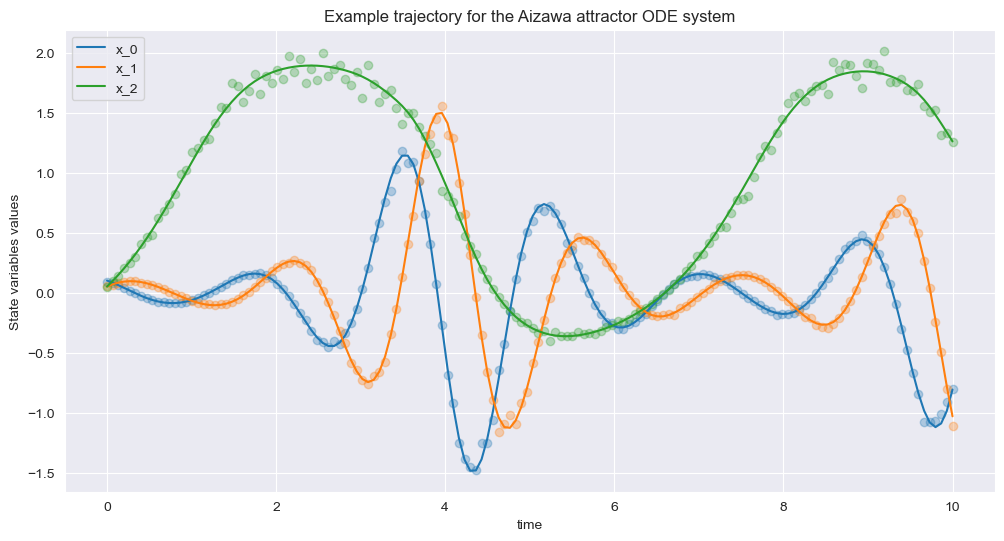

In [14]:
# load a trajectory with several state variables (noisy and non noisy)
file_trajectory = "../local_results/check_odebench_all_transformations/60-aizawa-attractor-chaotic/trajectory-0-noise-0.00.csv"
file_noisy = "../local_results/check_odebench_all_transformations/60-aizawa-attractor-chaotic/trajectory-0-noise-0.05.csv"

df_trajectory = pd.read_csv(file_trajectory)
df_noisy = pd.read_csv(file_noisy)

fig, ax = plt.subplots(figsize=(12,6))
t = df_trajectory["t"].values
for c in [c for c in df_trajectory.columns if c != 't'] :
    element = ax.plot(t, df_trajectory[c].values, label=c)
    ax.scatter(t, df_noisy[c].values, alpha=0.3, color=element[0].get_color())

ax.set_xlabel('time')
ax.set_ylabel('State variables values')
ax.set_title("Example trajectory for the Aizawa attractor ODE system")
ax.legend(loc='best')